In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

print(f'OpenCV: {cv2.__version__}')

OpenCV: 4.5.1


In [3]:
def imshow(img, enlarge = True, color = True):
    if enlarge:
        plt.figure(figsize=(15,10));
    if not color:
        plt.imshow(img, cmap='gray');
    else:
        plt.imshow(img[:,:,::-1]);

In [23]:
sudoku = cv2.imread('img/sudoku.png')
sudoku_1 = cv2.imread('img/sudoku_1.png',0)
sudoku_ph = cv2.imread('img/sudoku-photo-2.jpg')
sudoku_ph_1 = cv2.imread('img/sudoku_1.jpg',0)
chess = cv2.imread('img/chess.jpg')
waldo = cv2.imread('img/waldo.jpg',0)
waldo_scene = cv2.imread('img/WaldoScene1.jpg',0)

In [2]:
# imshow(star, False, False)

In [12]:
ret, template_th = cv2.threshold(waldo, 127,255,cv2.THRESH_BINARY_INV)
ret, img_th = cv2.threshold(waldo_scene, 127,255,cv2.THRESH_BINARY_INV)

template_contours, h = cv2.findContours(template_th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
image_contour, h = cv2.findContours(img_th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

error: OpenCV(4.5.1) ../modules/imgproc/src/contours.cpp:197: error: (-210:Unsupported format or combination of formats) [Start]FindContours supports only CV_8UC1 images when mode != CV_RETR_FLOODFILL otherwise supports CV_32SC1 images only in function 'cvStartFindContours_Impl'


In [ ]:
template_copy = waldo.copy()
cv2.drawContours(template_copy, template_contours, 0, (0,255,0),2)
imshow(template_copy)

In [ ]:
len(image_contour)

In [ ]:
template_contour = template_contours[0]
for contour in image_contour:
    match = cv2.matchShapes(template_contour,contour,cv2.CONTOURS_MATCH_I1,None)
    print(match)



In [ ]:
waldo_copy = waldo.copy()

template_contour = template_contours[0]
for contour in image_contour:
    match = cv2.matchShapes(template_contour,contour,cv2.CONTOURS_MATCH_I1,None)
    
    if match < 0.01:
        cv2.drawContours(waldo_copy, contour, -1, (0,255,0),1)

imshow(waldo_copy)

# Draw Lines

## Sudoku

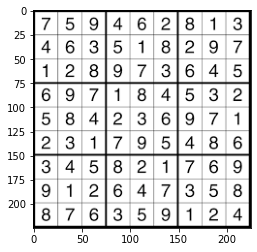

In [5]:
imshow(sudoku, False)

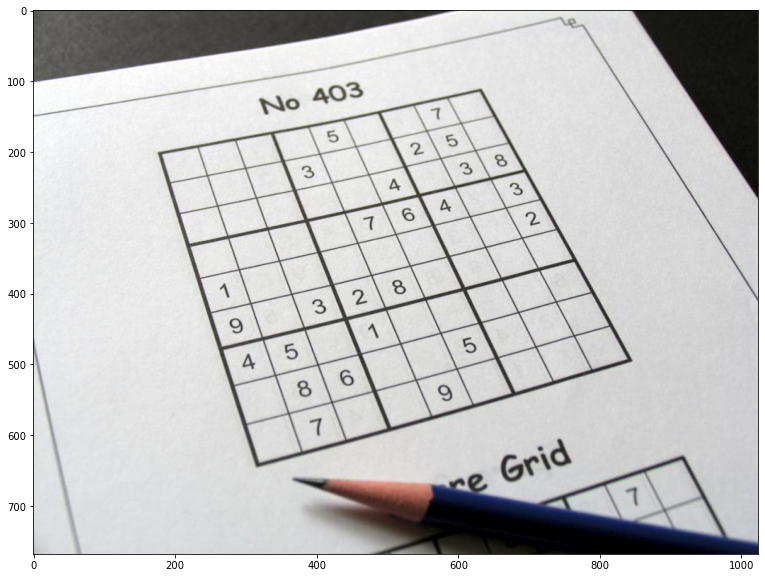

In [24]:
imshow(sudoku_ph, True)

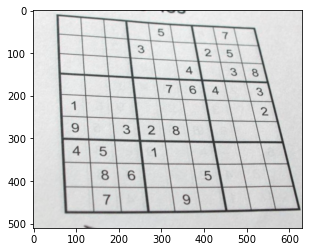

In [25]:
# Create a rotation matrix to rotate the image by 45 degrees (using the center as the pivot point) 
h, w = sudoku_ph.shape[:2]

x_center = w//2
y_center = h//2
rotation_matrix = cv2.getRotationMatrix2D((x_center,y_center), -15, 1,)

img_rot = cv2.warpAffine(sudoku_ph,rotation_matrix,(w,h))
# imshow(img_rot)

# cropping image

cropped_sudoku = img_rot[110:620,180:810]
imshow(cropped_sudoku, False, False)

In [29]:
cropped_sudoku_gray = cv2.cvtColor(cropped_sudoku,cv2.COLOR_BGR2GRAY)
ret, thr =cv2.threshold(cropped_sudoku_gray,127,255,cv2.THRESH_BINARY_INV)
# imshow(thr)

In [35]:
canny = cv2.Canny(cropped_sudoku_gray,100,200)
# imshow(canny)

In [33]:
lines = cv2.HoughLines(canny,1,np.pi/180,200)
# print(lines)

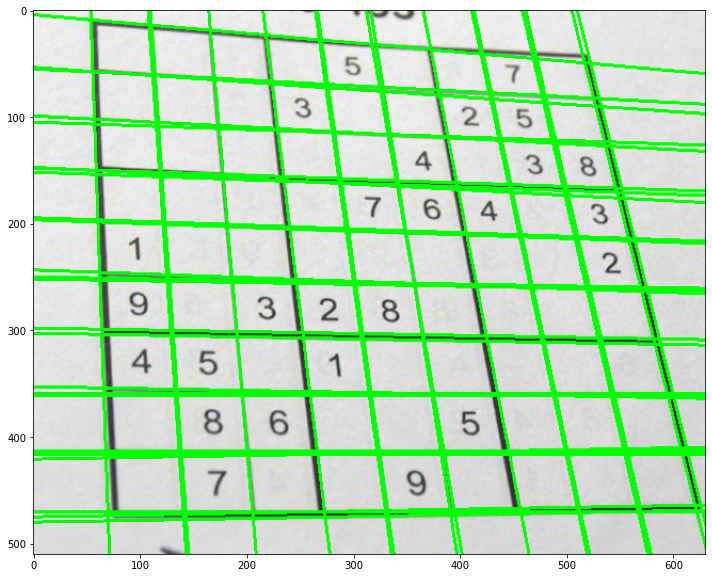

In [34]:
sudoku_copy = cropped_sudoku.copy()
for line in lines:
    for rho,theta in line:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

        cv2.line(sudoku_copy,(x1,y1),(x2,y2),(0,255,0),2)

imshow(sudoku_copy)



In [ ]:
# lines = cv2.HoughLinesP(canny,1,np.pi/180,200, minLineLenght=100, maxLineGap=5)
# print(lines)



# Draw Circles

In [ ]:
# drawing circles -> coins 
coins = img.copy()

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

blur = cv2.GaussianBlur(gray,(7,7),0)

circles = cv2.HoughCircles(blur,cv2.HOUGH_GRADIENT,dp=1.5,minDist=10)
# print(circles)

for circle in circles[0,:]:
    x = int(circle[0])
    y = int(circle[1])
    radius = int(circle[2])
    cv2.circle(coins,(x,y),radius,(0,255,0),2)
    cv2.circle(coins,(x,y),2,(255,0,255),-1)

imshow(coins)

print(len(circles[0,:]))